<a href="https://colab.research.google.com/github/Nofangagah/DS-final-project/blob/main/Final_project_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Practicum Final project**

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


import dataset

In [2]:

dataset = pd.read_csv('drive/MyDrive/datasets/data.csv')
print(dataset)

            ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  \
0            0                0       1         1          1   40       1   
1            1                0       0         0          0   25       1   
2            2                0       1         1          1   28       0   
3            3                0       1         0          1   27       0   
4            4                0       1         1          1   24       0   
...        ...              ...     ...       ...        ...  ...     ...   
253675  253675                0       1         1          1   45       0   
253676  253676                1       1         1          1   18       0   
253677  253677                0       0         0          1   28       0   
253678  253678                0       1         0          1   23       0   
253679  253679                1       1         1          1   25       0   

        Stroke  HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  \
0

data cleaning


In [3]:
print(dataset.isnull().sum())

ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


data preprosessing


In [24]:

dataset['Diabetes'] = np.where(
    ((dataset['BMI'] > 25) & (dataset['PhysActivity'] <= 1)) |
    (dataset['HighBP'] == 1) |
    (dataset['HighChol'] == 1) |
    (dataset['Age'] > 40),
    1,
    0
)

print(dataset['Diabetes'].value_counts())


Diabetes
1    206379
0     47301
Name: count, dtype: int64


menentukan fitur dan target

In [25]:
selected_data = dataset[['Diabetes', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
                      'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Education', 'Income']]



memisah data uji dan data latih

In [26]:
# Pisahkan fitur dan target
X = selected_data.drop(columns=['Diabetes'])
y = selected_data['Diabetes']

# Pisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


membuat dan melatih model menggunakan Logistic Regression

In [27]:
logistic_model = LogisticRegression(max_iter=1000, random_state=123)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=123)

evaluasi model

In [28]:
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

memmbuat confusion matrix

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)


Confusion Matrix: 
 [[ 4700  4687]
 [ 2804 38545]]


test akurasi dan laopran klasifikasi

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.50      0.56      9387
           1       0.89      0.93      0.91     41349

    accuracy                           0.85     50736
   macro avg       0.76      0.72      0.73     50736
weighted avg       0.84      0.85      0.85     50736



Visualisasi hasil

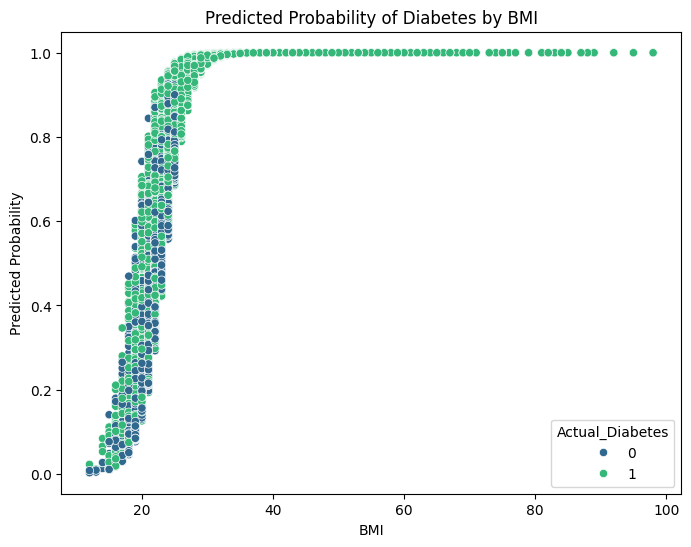

In [31]:
# Tambahkan prediksi ke data uji
X_test['Predicted_Probability'] = y_pred_proba
X_test['Actual_Diabetes'] = y_test.values

# Plot prediksi berdasarkan BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_test, x='BMI', y='Predicted_Probability', hue='Actual_Diabetes', palette='viridis')
plt.title("Predicted Probability of Diabetes by BMI")
plt.xlabel("BMI")
plt.ylabel("Predicted Probability")
plt.show()
